In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Mission 1. Netfilx and Code

In [40]:
netflix = pd.read_csv('./netflix_titles.csv')

### Mandatory Part 
- **한국 작품**은 총 얼마나 있는가?

In [38]:
korea = netflix[netflix['country']=='South Korea']
count = len(korea)
print('한국 작품 수 : {}'.format(count))

한국 작품 수 : 183


### Bonus Part
- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?

In [35]:
country_count = netflix['country'].groupby(by=netflix['country']).count()
country_max = country_count.idxmax()
max_count = country_count[country_max]
print('가장 많은 작품이 올라간 국가 : {}, 작품 수 : {}'.format(country_max, max_count))

가장 많은 작품이 올라간 국가 : United States, 작품 수 : 2555


### Mission 2. 가즈아!

### Mandatory Part
- 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.

In [130]:
bitcoin = pd.read_csv('./BitCoin.csv')
bitcoin['Date'] = pd.to_datetime(bitcoin['Date']) # 문자열 상태에서 그래프 만들었더니 x축에 아무것도 보이지 않아서 datetime형태로 바꿔봤습니다.

period = bitcoin[(bitcoin['Date']>='2016-06-01') & (bitcoin['Date']<='2017-06-30')]
period = period.sort_values(by='Date')
period

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
625,625,2016-06-01,431.86,431.86,426.34,429.11,3.404250e+07,6498830000
594,594,2016-06-02,386.59,386.63,372.39,376.52,4.924930e+07,5865740000
565,565,2016-06-03,400.52,411.91,395.78,407.71,9.121250e+07,6121400000
534,534,2016-06-04,424.28,424.53,422.73,423.41,5.909100e+07,6533260000
504,504,2016-06-05,447.94,461.38,447.07,459.60,7.279680e+07,6947800000
...,...,...,...,...,...,...,...,...
88,88,2017-06-26,2590.57,2615.25,2376.29,2478.45,1.663280e+09,42514000000
87,87,2017-06-27,2478.45,2552.45,2332.99,2552.45,1.489790e+09,40677900000
86,86,2017-06-28,2553.03,2603.98,2484.42,2574.79,1.183870e+09,41906700000
85,85,2017-06-29,2567.56,2588.83,2510.48,2539.32,9.499790e+08,42150300000


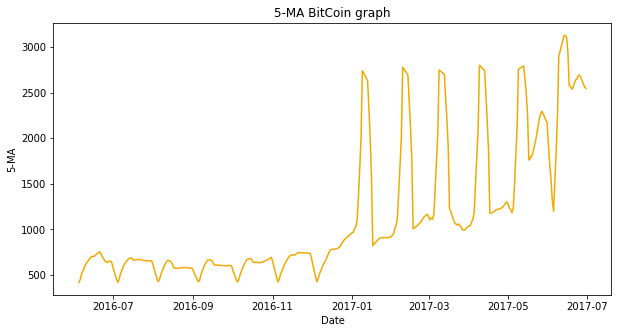

In [131]:
period['5-MA'] = period['Open'].rolling(window=5).mean()

plt.figure(figsize = (10,5))
plt.title('5-MA BitCoin graph')
plt.xlabel('Date')
plt.ylabel('5-MA')
plt.plot(period['Date'],period['5-MA'],color='#f2a900')
plt.show()

### Bonus Part
- 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그려주세요.

In [135]:
eth = pd.read_csv('./ETH_day.csv')
eth['Date'] = pd.to_datetime(eth['Date']) # 문자열 상태에서 그래프 만들었더니 x축에 아무것도 보이지 않아서 datetime형태로 바꿔봤습니다.

period_eth = eth[(eth['Date']>='2016-06-01') & (eth['Date']<='2017-06-30')]
period_eth = period_eth.sort_values(by='Date')
period_eth

,Date,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
1414,2016-06-01,ETHUSD,14.18,14.35,13.54,13.95,6390.06,89027.81
1413,2016-06-02,ETHUSD,13.95,14.13,13.82,13.90,942.85,13180.38
1412,2016-06-03,ETHUSD,13.90,16.05,13.50,14.02,11426.53,157342.19
1411,2016-06-04,ETHUSD,14.02,14.16,13.64,13.86,4330.50,59977.39
1410,2016-06-05,ETHUSD,13.86,13.92,13.70,13.91,787.49,10869.67
...,...,...,...,...,...,...,...,...
1024,2017-06-26,ETHUSD,278.73,299.90,210.00,253.00,249076.24,60950252.99
1023,2017-06-27,ETHUSD,253.00,288.17,210.02,286.21,173179.40,42085473.60
1022,2017-06-28,ETHUSD,286.21,324.95,260.49,317.59,184030.56,54573461.77
1021,2017-06-29,ETHUSD,317.59,322.84,285.23,293.80,152271.32,46521350.06


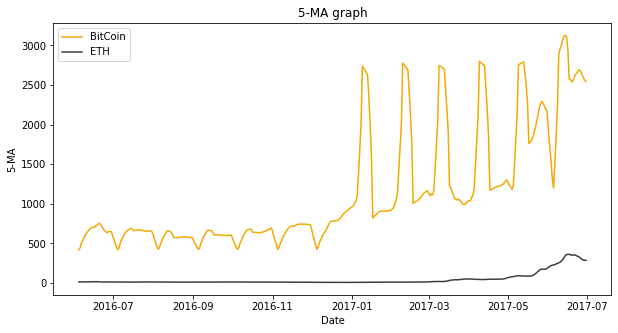

In [142]:
period_eth['5-MA'] = period_eth['Open'].rolling(window=5).mean()

plt.figure(figsize = (10,5))
plt.title('5-MA graph')
plt.xlabel('Date')
plt.ylabel('5-MA')
plt.plot(period['Date'],period['5-MA'],color='#f2a900', label = 'BitCoin')
plt.plot(period_eth['Date'],period_eth['5-MA'],color='#3c3c3d', label = 'ETH')
plt.legend()
plt.show()